<a href="https://colab.research.google.com/github/gyasifred/NLP-Techniques/blob/main/spaCy_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
!pip install -U spacy

In [ ]:
# download trained models
!python -m spacy download en_core_web_lg

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

## Linguistics Annotations

In [ ]:
doc = nlp("Company Y is planning to acquire stake in X company for $23 billion")
for token in doc:
  print(token.text, token.pos_, token.dep_)

## SpaCy Pipeline

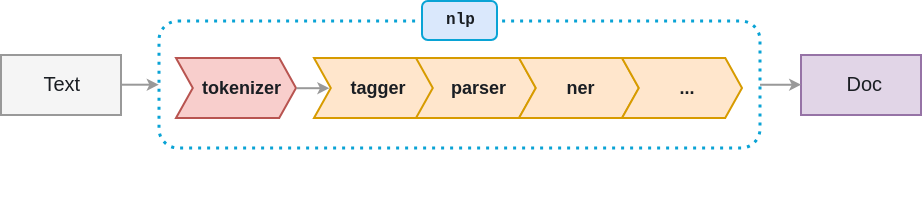

In [ ]:
nlp.pipe_names

# Features

## Tokenization

In [ ]:
doc = nlp("Reliance is looking at buying U.K. based analytics startup for $7 billion")
for token in doc:
  print(token.text)

## Part-Of-Speech (POS) Tagging

In [ ]:
doc = nlp("Reliance is looking at buying U.K. based analytics startup for $7 billion")

# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token, token.tag_, token.pos_, spacy.explain(token.tag_))

In [ ]:
from spacy import displacy
displacy.render(doc,style='dep',jupyter=True)

## Dependency Parsing

In [ ]:
# Create an nlp object
doc = nlp("Reliance is looking at buying U.K. based analytics startup for $7 billion")

# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.dep_)

In [ ]:
spacy.explain("nsubj"), spacy.explain("ROOT"), spacy.explain("aux"), spacy.explain("advcl"), spacy.explain("dobj")

## Lematization

In [ ]:
# Create an nlp object
doc = nlp("Reliance is looking at buying U.K. based analytics startup for $7 billion")

# Iterate over the tokens
for token in doc:
    # Print the token and its lemma
    print(token.text, "-->", token.lemma_)

## Sentence Boundary Detection (SBD)

In [ ]:
# Create an nlp object
doc = nlp("Reliance is looking at buying U.K. based analytics startup for $7 billion.This is India.India is great")
sentences = list(doc.sents)
len(sentences)

In [ ]:
for sentence in sentences:
     print (sentence)

## Named Entity Recognition (NER)

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Reliance is looking at buying U.K. based analytics startup for $7 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [ ]:
spacy.explain("ORG"),spacy.explain("GPE"),spacy.explain("MONEY")

## Entity Detection

In [ ]:
doc= nlp(u"""The Amazon rainforest,[a] alternatively, the Amazon Jungle, also known in English as Amazonia, is a moist broadleaf tropical rainforest in the Amazon biome that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 km2 (2,700,000 sq mi), of which 5,500,000 km2 (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations.

The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Bolivia, Ecuador, French Guiana, Guyana, Suriname, and Venezuela. Four nations have "Amazonas" as the name of one of their first-level administrative regions and France uses the name "Guiana Amazonian Park" for its rainforest protected area. The Amazon represents over half of the planet's remaining rainforests,[2] and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species.[3]

Etymology
The name Amazon is said to arise from a war Francisco de Orellana fought with the Tapuyas and other tribes. The women of the tribe fought alongside the men, as was their custom.[4] Orellana derived the name Amazonas from the Amazons of Greek mythology, described by Herodotus and Diodorus.[4]

History
See also: History of South America § Amazon, and Amazon River § History
Tribal societies are well capable of escalation to all-out wars between tribes. Thus, in the Amazonas, there was perpetual animosity between the neighboring tribes of the Jivaro. Several tribes of the Jivaroan group, including the Shuar, practised headhunting for trophies and headshrinking.[5] The accounts of missionaries to the area in the borderlands between Brazil and Venezuela have recounted constant infighting in the Yanomami tribes. More than a third of the Yanomamo males, on average, died from warfare.[6]""")

In [ ]:
entities=[(i, i.label_, i.label) for i in doc.ents]
entities

In [ ]:
displacy.render(doc, style = "ent",jupyter = True)

## Similarity

In [ ]:
nlp = spacy.load("en_core_web_lg")
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

In [ ]:
nlp = spacy.load("en_core_web_lg")  # make sure to use larger model!
tokens = nlp("dog cat banana")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

# Text Classification

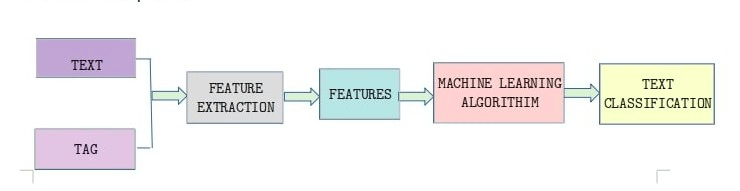

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
# models
from sklearn.linear_model import LogisticRegression

In [ ]:
df_amazon = pd.read_csv ("/content/drive/MyDrive/amazon_alexa.tsv", sep="\t")
df_amazon.head()

In [ ]:
df_amazon.shape

In [ ]:
# plot istribution of target
df_amazon['feedback'].hist(figsize=(5,4))

The feedback  shows huge class imbalance

In [ ]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.blank("en")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [ ]:
# Create a vectorizer object
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [ ]:
# Texting tfidf vectorizer
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [ ]:
X = df_amazon['verified_reviews'] # the features we want to analyze
ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# Logistic Regression Classifier
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

In [ ]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))